In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Read in cleaned data
clean_data = "./data/processed/US_SRG_merged_clean.pkl"
df_clean = pd.read_pickle(clean_data)

df_clean.head()

,Date,Rain_mm,AirTemp_C,SolarRad_kWm2,VPD_kPa,SoilTemp_10cm_C,SoilH2O_m3m3,Wind_speed_ms,RelHum_%,ET_mm_month
0,2020-01-01,0.803,10.648,0.155802,0.8084,16.187,14.511,1.865,36.957678,17.5768
1,2020-02-01,0.928,11.139,0.195431,0.9336,16.180,13.042,2.313,29.533900,43.3578
2,2020-03-01,0.877,13.300,0.221349,0.9693,16.185,10.743,2.191,36.539953,55.9308
3,2020-04-01,0.271,18.385,0.319464,1.7799,16.182,5.891,2.142,15.823503,42.8244
4,2020-05-01,0.451,24.416,0.328748,2.6492,16.194,3.809,1.932,13.403330,59.3344


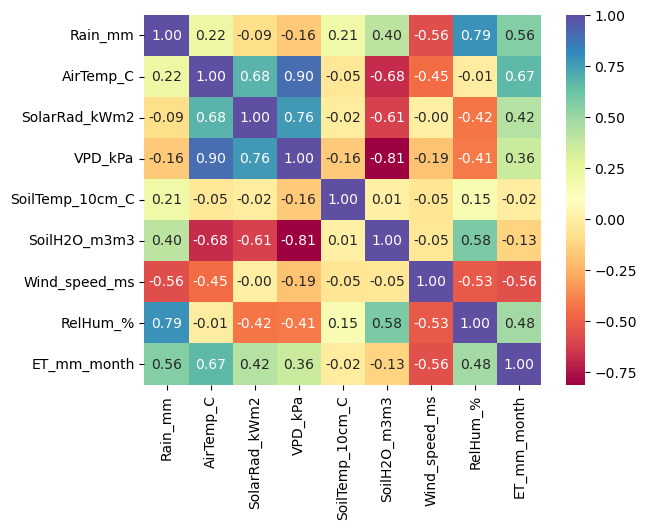

In [2]:
# Create matrix to identify strong correlations
corr_matrix = df_clean.drop("Date", axis=1).corr()

sns.heatmap(corr_matrix, annot=True, cmap="Spectral", fmt=".2f")

plt.show()

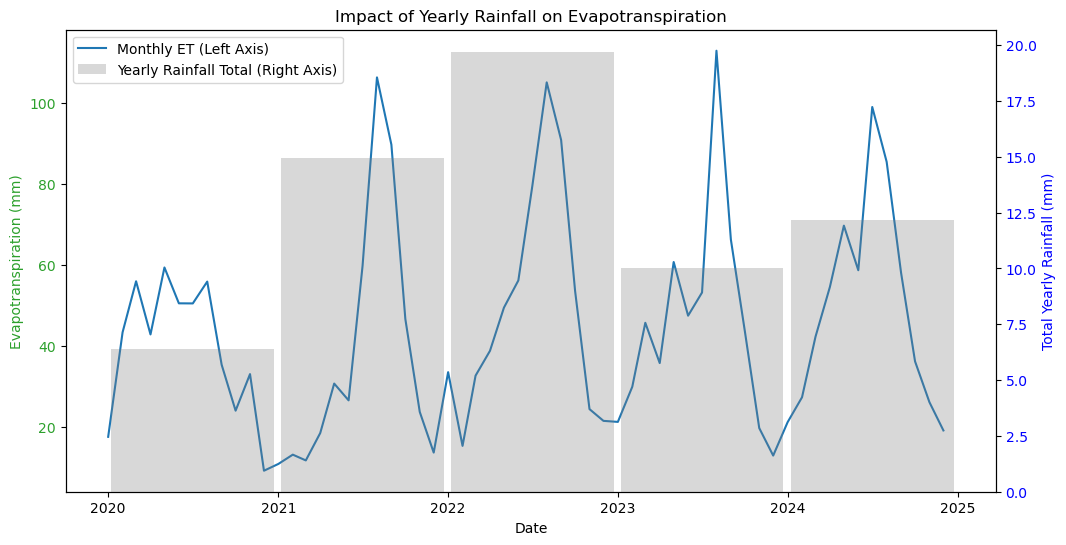

In [3]:
# Create ET and Rainfall plot over time

# Get yearly rain totals and rename new columns
yearly_rain = df_clean.groupby(df_clean["Date"].dt.year)["Rain_mm"].sum().reset_index()
yearly_rain.columns = ["Year", "Total_Rain"]

# Create column to anchor yearly rain bar to center of year
yearly_rain["Plot_Date"] = pd.to_datetime(yearly_rain["Year"].astype(str) + "-07-01")

# Set figure and yax1 size
fig, yax1 = plt.subplots(figsize=(12, 6))

# Create ET line plot and se left y axis
sns.lineplot(
    data=df_clean,
    x="Date",
    y="ET_mm_month",
    ax=yax1,
    color="tab:blue",
    label="Monthly ET (Left Axis)",
)
yax1.set_ylabel("Evapotranspiration (mm)", color="tab:green")
yax1.tick_params(axis="y", labelcolor="tab:green")

# Create total yearly rainfall right y axis
yax2 = yax1.twinx()
yax2.bar(
    yearly_rain["Plot_Date"],
    yearly_rain["Total_Rain"],
    color="grey",
    alpha=0.3,
    width=350,
    label="Yearly Rainfall Total (Right Axis)",
)
yax2.set_ylabel("Total Yearly Rainfall (mm)", color="blue")
yax2.tick_params(axis="y", labelcolor="blue")

# Create legend
lines_yax1, lbls_yax1 = yax1.get_legend_handles_labels()
lines_yax2, lbls_yax2 = yax2.get_legend_handles_labels()
yax1.legend(lines_yax1 + lines_yax2, lbls_yax1 + lbls_yax2, loc="upper left")

# Set title and show
plt.title("Impact of Yearly Rainfall on Evapotranspiration")
plt.show()

Text(0.5, 1.0, 'ET Relationship: Rain')

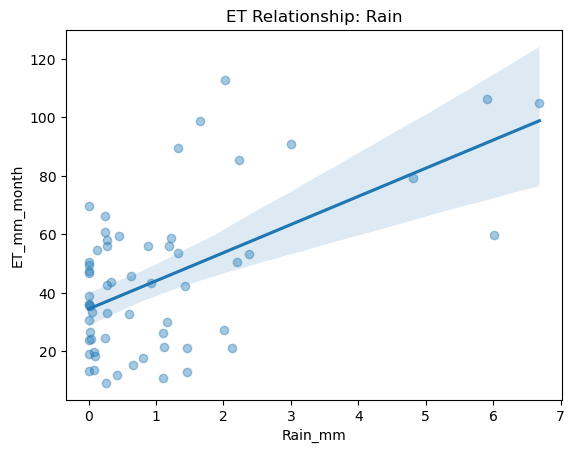

In [4]:
# Show ET vs Rain relationship
sns.regplot(data=df_clean, x="Rain_mm", y="ET_mm_month", scatter_kws={"alpha": 0.4})
plt.title("ET Relationship: Rain")

Text(0.5, 1.0, 'ET Relationship: Air Temperature')

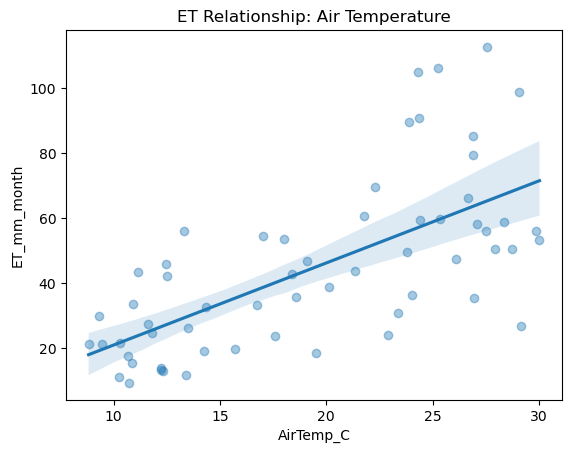

In [5]:
# Show ET vs Air Temperature relationship
sns.regplot(data=df_clean, x="AirTemp_C", y="ET_mm_month", scatter_kws={"alpha": 0.4})
plt.title("ET Relationship: Air Temperature")

Text(0.5, 1.0, 'ET Relationship: Air Temperature and Rain')

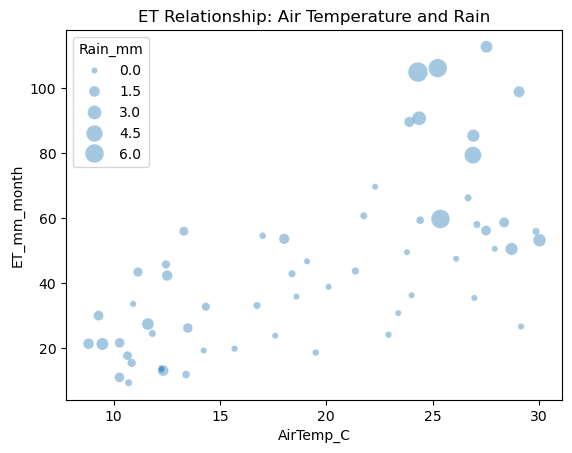

In [6]:
# Show ET vs Air Temperature and Rain Relationship
sns.scatterplot(
    data=df_clean, x="AirTemp_C", y="ET_mm_month", size="Rain_mm", sizes=(20, 200), alpha=0.4
)
plt.title("ET Relationship: Air Temperature and Rain")

Text(0.5, 1.0, 'ET Relationship: Wind Speed')

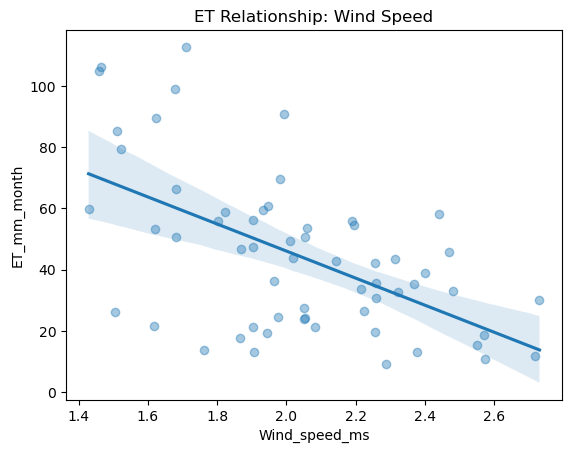

In [7]:
# Show ET vs Wind Speed relationship
sns.regplot(data=df_clean, x="Wind_speed_ms", y="ET_mm_month", scatter_kws={"alpha": 0.4})
plt.title("ET Relationship: Wind Speed")

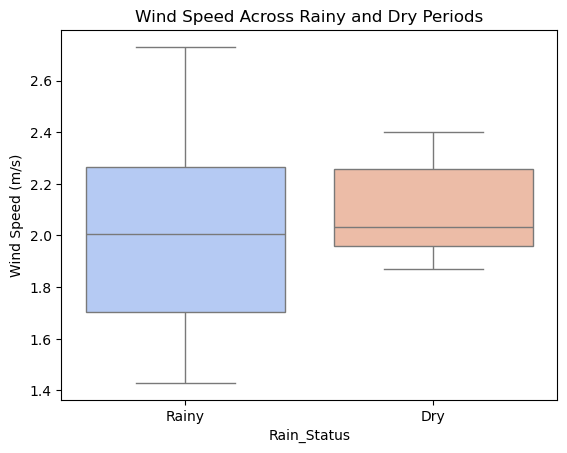

In [8]:
# Create new rain_status category column
df_clean["Rain_Status"] = df_clean["Rain_mm"].apply(lambda x: "Rainy" if x > 0 else "Dry")

# Display new category on boxplot and show relationship to wind speed
sns.boxplot(
    data=df_clean, x="Rain_Status", y="Wind_speed_ms", hue="Rain_Status", palette="coolwarm"
)
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed Across Rainy and Dry Periods")
plt.show()

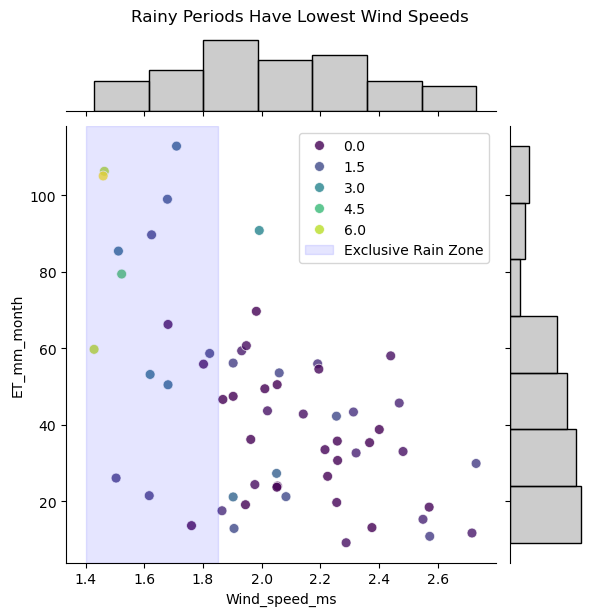

In [9]:
# Create plot to show relationship between wind speed and rain with exclusive rain zone
grid = sns.JointGrid(data=df_clean, x="Wind_speed_ms", y="ET_mm_month")
grid.plot_joint(sns.scatterplot, hue=df_clean["Rain_mm"], palette="viridis", s=50, alpha=0.8)
grid.ax_joint.axvspan(1.4, 1.85, color="blue", alpha=0.1, label="Exclusive Rain Zone")

# Create histograms for top and right
grid.plot_marginals(sns.histplot, kde=False, color="grey", alpha=0.4)

grid.ax_joint.legend()
grid.fig.suptitle("Rainy Periods Have Lowest Wind Speeds", y=1.02)
plt.show()

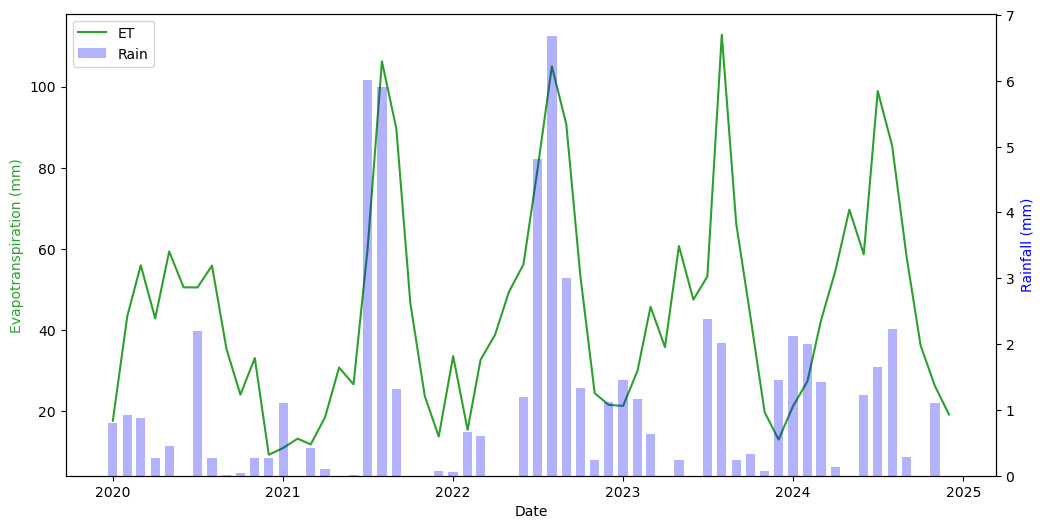

In [10]:
# Set figure and yax1 size
fig, yax1 = plt.subplots(figsize=(12, 6))

# Create ET line plot and se left y axis
sns.lineplot(data=df_clean, x="Date", y="ET_mm_month", ax=yax1, color="tab:green", label="ET")
yax1.set_ylabel("Evapotranspiration (mm)", color="tab:green")

# Create total yearly rainfall right y axis
yax2 = yax1.twinx()
yax2.bar(df_clean["Date"], df_clean["Rain_mm"], color="blue", alpha=0.3, label="Rain", width=20)
yax2.set_ylabel("Rainfall (mm)", color="blue")

# Create legend
lines_yax1, lbls_yax1 = yax1.get_legend_handles_labels()
lines_yax2, lbls_yax2 = yax2.get_legend_handles_labels()
yax1.legend(lines_yax1 + lines_yax2, lbls_yax1 + lbls_yax2, loc="upper left")

# Set title and show
plt.title("")
plt.show()

Text(0.5, 1.0, 'ET Relationship: Relative Humidity')

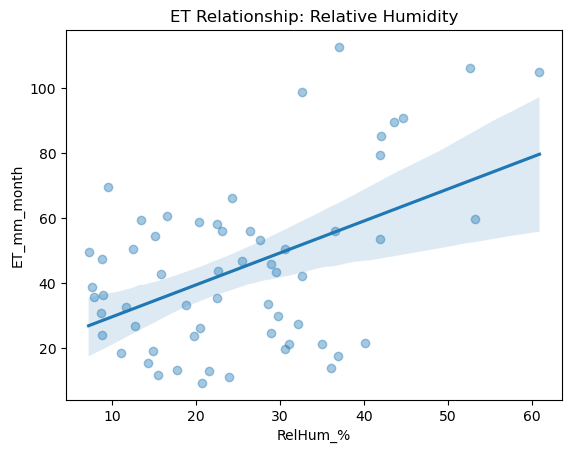

In [11]:
# Show ET vs Relative Humidity relationship
sns.regplot(data=df_clean, x="RelHum_%", y="ET_mm_month", scatter_kws={"alpha": 0.4})
plt.title("ET Relationship: Relative Humidity")

Text(0.5, 1.0, 'ET Relationship: Soil Moisture')

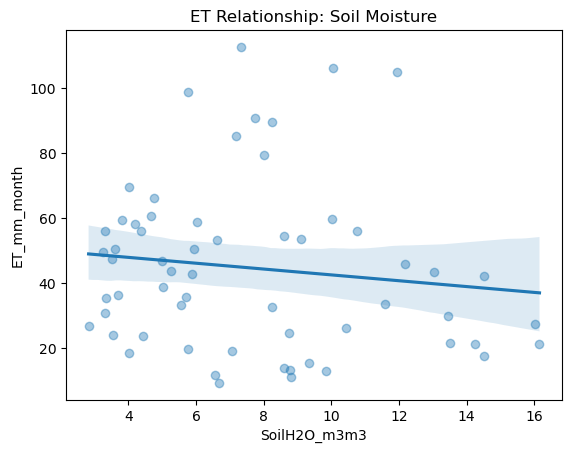

In [12]:
# Show ET vs Soil Moisture relationship
sns.regplot(data=df_clean, x="SoilH2O_m3m3", y="ET_mm_month", scatter_kws={"alpha": 0.4})
plt.title("ET Relationship: Soil Moisture")

<Axes: xlabel='Wind_speed_ms', ylabel='ET_mm_month'>

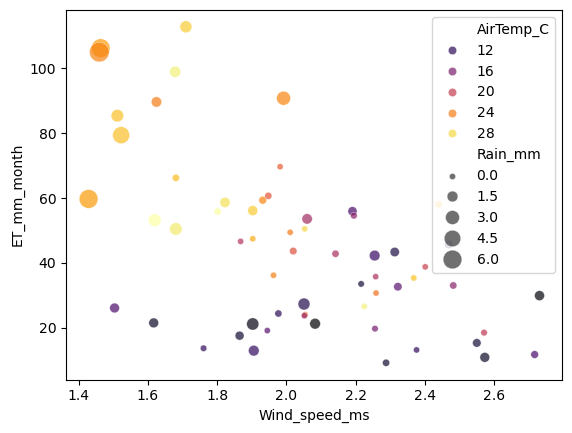

In [13]:
# Show ET vs Wind Speed relationship using Air Temp colors and Wind Speed size
sns.scatterplot(
    data=df_clean,
    x="Wind_speed_ms",
    y="ET_mm_month",
    hue="AirTemp_C",
    palette="inferno",
    size="Rain_mm",
    sizes=(20, 200),
    alpha=0.7,
)

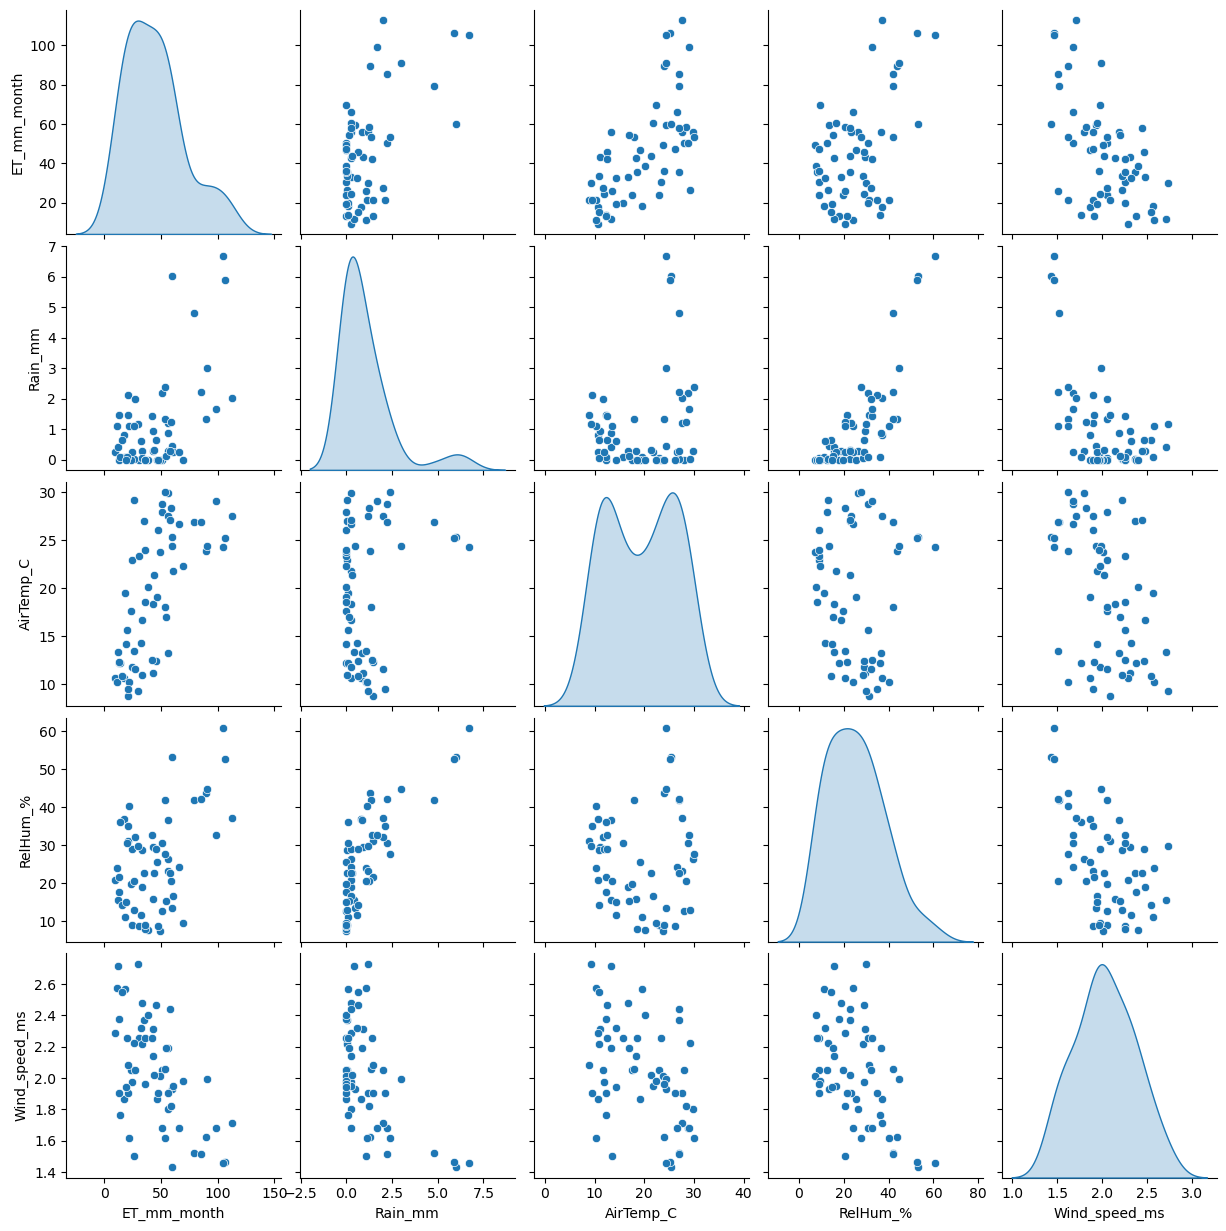

In [14]:
# Create ET pairplot with important variable correlations
et_vars = ["ET_mm_month", "Rain_mm", "AirTemp_C", "RelHum_%", "Wind_speed_ms"]

sns.pairplot(df_clean[et_vars], diag_kind="kde")
plt.show()